# NumPy

In [173]:
import numpy as np

In [174]:
data = np.random.randn(2, 3)
data

array([[-0.46861928, -0.34678617,  1.24901699],
       [-2.06738552, -0.15010294,  2.29204945]])

In [175]:
data * 10

array([[ -4.68619276,  -3.46786168,  12.49016994],
       [-20.67385515,  -1.50102936,  22.92049454]])

In [176]:
data + data

array([[-0.93723855, -0.69357234,  2.49803399],
       [-4.13477103, -0.30020587,  4.58409891]])

In [177]:
data.shape

(2, 3)

In [178]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

### indexação e fatiamento

In [179]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [180]:
arr[6]

6

In [181]:
arr[5:8]

array([5, 6, 7])

In [182]:
# array bidimensional, uma matriz, consultamos linha, coluna
data[1][0:2]

array([-2.06738552, -0.15010294])

In [183]:
data.T

array([[-0.46861928, -2.06738552],
       [-0.34678617, -0.15010294],
       [ 1.24901699,  2.29204945]])

### Funções universais

In [184]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [185]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [186]:
data2 = np.random.rand(2,3)
data2

array([[0.73033356, 0.19192062, 0.81128694],
       [0.02177929, 0.85968289, 0.82419919]])

In [187]:
data3 = np.maximum(data, data2)
data3

array([[0.73033356, 0.19192062, 1.24901699],
       [0.02177929, 0.85968289, 2.29204945]])

In [188]:
print(data3.sum())
print(data3.mean())
print(data3.cumprod())

5.344782810822773
0.8907971351371288
[0.73033356 0.14016607 0.1750698  0.0038129  0.00327788 0.00751307]


In [189]:
data.sort()
data

array([[-0.46861928, -0.34678617,  1.24901699],
       [-2.06738552, -0.15010294,  2.29204945]])

# Pandas

In [190]:
import pandas as pd
import sqlite3 as sql

In [216]:
df_cardio = pd.read_json('cardio.json')
df_cardio

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.4
166,60,115,145,310.2
167,75,120,150,320.4


In [192]:
type(df_cardio)

pandas.core.frame.DataFrame

In [193]:
type(df_cardio.Calories)

pandas.core.series.Series

In [194]:
df_cardio['Calories']

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.4
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 169, dtype: float64

In [195]:
type(df_cardio.index)

pandas.core.indexes.numeric.Int64Index

In [196]:
df_cardio.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.4
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


In [197]:
df_cardio.drop(columns=['Maxpulse', 'Pulse'])

In [198]:
df_cardio

,Duration,Calories
0,60,409.1
1,60,479.0
2,60,340.0
3,45,282.4
4,45,406.0
...,...,...
164,60,290.8
165,60,300.4
166,60,310.2
167,75,320.4


In [199]:
df_cardio * 3
df_cardio / 2
df_cardio + df_cardio

,Duration,Calories
0,120,818.2
1,120,958.0
2,120,680.0
3,90,564.8
4,90,812.0
...,...,...
164,120,581.6
165,120,600.8
166,120,620.4
167,150,640.8


In [200]:
df_cardio.describe()

,Duration,Calories
count,169.000000,164.000000
mean,63.846154,375.800000
std,42.299949,266.377134
min,15.000000,50.300000
25%,45.000000,250.925000
50%,60.000000,318.600000
75%,60.000000,387.600000
max,300.000000,1860.400000


In [201]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Calories  164 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [202]:
# df_cardio['Calories'] = df_cardio['Calories'].fillna(0)
df_cardio['Calories'] = df_cardio['Calories'].fillna(df_cardio['Calories'].mean())
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Calories  169 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [203]:
df_cardio.corr('spearman')

,Duration,Calories
Duration,1.000000,0.800875
Calories,0.800875,1.000000


In [204]:
df_cardio.cov()

,Duration,Calories
Duration,1789.285714,10227.979167
Calories,10227.979167,68844.968690


In [205]:
df_ibov = pd.read_csv('IBOVDia_05-01-22.csv', sep=';', skiprows=1, index_col=False)
df_ibov.drop(df_ibov.index[-2:], inplace=True)
df_ibov.head()

,Codigo,Acao,Tipo,Qtde. Teorica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,199.733.824,"0,349"
1,ALPA4,ALPARGATAS,PN EJ N1,167.963.777,"0,284"
2,ABEV3,AMBEV S/A,ON,4.359.908.680,"3,387"
3,AMER3,AMERICANAS,ON NM,397.635.158,"0,605"
4,ASAI3,ASSAI,ON NM,794.310.097,"0,513"


In [206]:
df_ibov.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92],
           dtype='int64')

In [207]:
df_ibov.rename(columns={
    'Codigo': 'codigo',
    'Aodigo': 'acao',
    'Qtde. Teorica': 'qtde_teorica',
    'Part. (%)': 'participacao'
    }, inplace=True)

In [208]:
df_ibov.describe(include='all')

,codigo,Acao,Tipo,qtde_teorica,participacao
count,93,93,93,93,93
unique,93,90,20,93,92
top,BBAS3,ELETROBRAS,ON NM,811.759.800,"1,162"
freq,1,2,51,1,2


In [209]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codigo        93 non-null     object
 1   Acao          93 non-null     object
 2   Tipo          93 non-null     object
 3   qtde_teorica  93 non-null     object
 4   participacao  93 non-null     object
dtypes: object(5)
memory usage: 4.4+ KB


In [210]:
pd.to_numeric(df_ibov['participacao'])

ValueError: Unable to parse string "0,349" at position 0

In [211]:
df_ibov['qtde_teorica'] = df_ibov['qtde_teorica'].str.replace('.', '').astype(float)

<ipython-input-211-f876c6226a09>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_ibov['qtde_teorica'] = df_ibov['qtde_teorica'].str.replace('.', '').astype(float)


In [212]:
df_ibov['participacao'] = df_ibov['participacao'].str.replace(',', '.').astype(float)

In [213]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        93 non-null     object 
 1   Acao          93 non-null     object 
 2   Tipo          93 non-null     object 
 3   qtde_teorica  93 non-null     float64
 4   participacao  93 non-null     float64
dtypes: float64(2), object(3)
memory usage: 4.4+ KB


In [214]:
df_ibov.loc[df_ibov['participacao'] > 5]

,codigo,Acao,Tipo,qtde_teorica,participacao
52,ITUB4,ITAUUNIBANCO,PN EJ N1,4.780003e+09,5.366
69,PETR4,PETROBRAS,PN N2,4.566442e+09,6.766
88,VALE3,VALE,ON NM,3.843571e+09,15.034


In [215]:
df_ibov['participacao'] > 5

0     False
1     False
2     False
3     False
4     False
      ...  
88     True
89    False
90    False
91    False
92    False
Name: participacao, Length: 93, dtype: bool

In [217]:
df_ibov.iloc[[88, 89]]

,codigo,Acao,Tipo,qtde_teorica,participacao
88,VALE3,VALE,ON NM,3.843571e+09,15.034
89,VIIA3,VIA,ON NM,1.595896e+09,0.383


In [218]:
df_ibov.loc[(df_ibov['participacao'] > 2) & (df_ibov['participacao'] < 5)]

,codigo,Acao,Tipo,qtde_teorica,participacao
2,ABEV3,AMBEV S/A,ON,4.359909e+09,3.387
6,B3SA3,B3,ON EJ NM,6.065856e+09,3.371
12,BBDC4,BRADESCO,PN EJ N1,4.691428e+09,4.714
14,BBAS3,BRASIL,ON NM,1.420531e+09,2.080
51,ITSA4,ITAUSA,PN N1,4.736048e+09,2.185
53,JBSS3,JBS,ON NM,1.290737e+09,2.374
68,PETR3,PETROBRAS,ON N2,2.703324e+09,4.379
81,SUZB3,SUZANO S.A.,ON NM,7.267793e+08,2.246
91,WEGE3,WEG,ON NM,1.484859e+09,2.401


In [219]:
df_ibov.describe(include='all')

,codigo,Acao,Tipo,qtde_teorica,participacao
count,93,93,93,9.300000e+01,93.000000
unique,93,90,20,NaN,NaN
top,BBAS3,ELETROBRAS,ON NM,NaN,NaN
freq,1,2,51,NaN,NaN
mean,NaN,NaN,NaN,1.002412e+09,1.075269
std,NaN,NaN,NaN,1.198045e+09,1.870141
min,NaN,NaN,NaN,7.805372e+07,0.039000
25%,NaN,NaN,NaN,3.008331e+08,0.252000
50%,NaN,NaN,NaN,5.921146e+08,0.526000
75%,NaN,NaN,NaN,1.131883e+09,1.080000


In [220]:
df_estatistica = df_ibov.describe(include='all')
type(df_estatistica)

pandas.core.frame.DataFrame

In [221]:
conexao = sql.connect('parte-II.db')
df_estatistica.to_sql('estatistica', conexao)

ValueError: Table 'estatistica' already exists.

In [222]:
df_ibov.to_sql('ibov', conexao, if_exists='replace')
df_cardio.to_sql('cardio', conexao, if_exists='replace', index=False)

# Matplotlib

<AxesSubplot:>

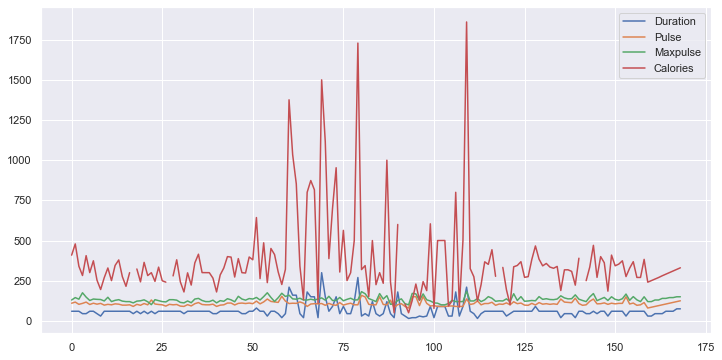

In [223]:
df_cardio.plot()

<AxesSubplot:>

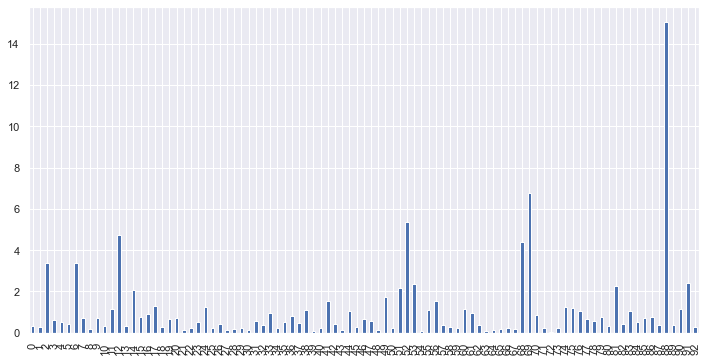

In [229]:
df_ibov['participacao'].plot.bar()

In [230]:
df_tempo = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
df_tempo.head()

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0


In [231]:
df_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    748 non-null    int64  
 1   Month   748 non-null    int64  
 2   Tmax    748 non-null    float64
 3   Tmin    748 non-null    float64
 4   Rain    748 non-null    float64
 5   Sun     748 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 35.2 KB


In [245]:
df_tempo.corr()

,Year,Month,Tmax,Tmin,Rain,Sun
Year,1.000000,-0.010776,0.096586,0.116028,0.001069,0.051843
Month,-0.010776,1.000000,0.232060,0.305854,0.159164,-0.030693
Tmax,0.096586,0.232060,1.000000,0.976031,-0.059147,0.840275
Tmin,0.116028,0.305854,0.976031,1.000000,0.034653,0.727788
Rain,0.001069,0.159164,-0.059147,0.034653,1.000000,-0.230685
Sun,0.051843,-0.030693,0.840275,0.727788,-0.230685,1.000000


In [232]:
df_tempo.to_sql('tempo', conexao, if_exists='replace', index=False)

In [233]:
df_clima_2018 = pd.read_sql('select * from tempo where year = 2018', conexao)
df_clima_2018

,Year,Month,Tmax,Tmin,Rain,Sun
0,2018,1,9.7,3.8,58.0,46.5
1,2018,2,6.7,0.6,29.0,92.0
2,2018,3,9.8,3.0,81.2,70.3
3,2018,4,15.5,7.9,65.2,113.4
4,2018,5,20.8,9.8,58.4,248.3
5,2018,6,24.2,13.1,0.4,234.5
6,2018,7,28.3,16.4,14.8,272.5
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0


In [234]:
df_clima_89 = pd.read_sql('select * from tempo where year = 1989', conexao)
df_clima_89

,Year,Month,Tmax,Tmin,Rain,Sun
0,1989,1,9.5,3.1,26.0,59.2
1,1989,2,10.2,2.6,40.2,94.2
2,1989,3,12.9,4.5,56.6,100.0
3,1989,4,11.5,4.3,64.2,144.5
4,1989,5,21.0,10.0,12.1,310.1
5,1989,6,22.1,11.4,35.5,258.5
6,1989,7,25.8,14.8,36.7,274.8
7,1989,8,24.2,13.1,55.7,267.1
8,1989,9,20.7,12.6,10.8,131.2
9,1989,10,17.1,9.7,52.8,113.4


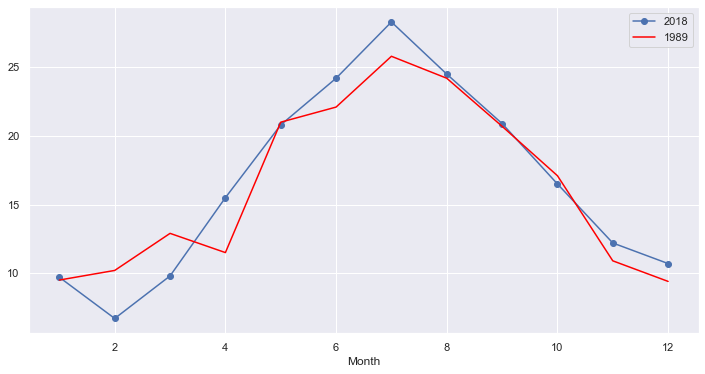

In [236]:
ax_2018 = df_clima_2018.plot(x='Month', y='Tmax', marker='o')

ax = df_clima_89.plot(x='Month', y='Tmax', color='red', ax=ax_2018)

ax.legend(['2018','1989'])

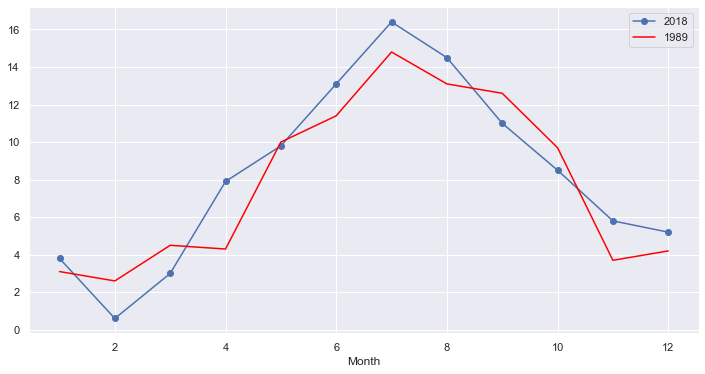

In [237]:
ax_2018 = df_clima_2018.plot(x='Month', y='Tmin', marker='o')

ax = df_clima_89.plot(x='Month', y='Tmin', color='red', ax=ax_2018)

ax.legend(['2018','1989'])

In [238]:
df_july = pd.read_sql('SELECT * FROM tempo WHERE month == 6', conexao)

In [239]:
df_july.sort_values(by=['Tmax'], ascending=False, inplace=True)

<AxesSubplot:xlabel='Year'>

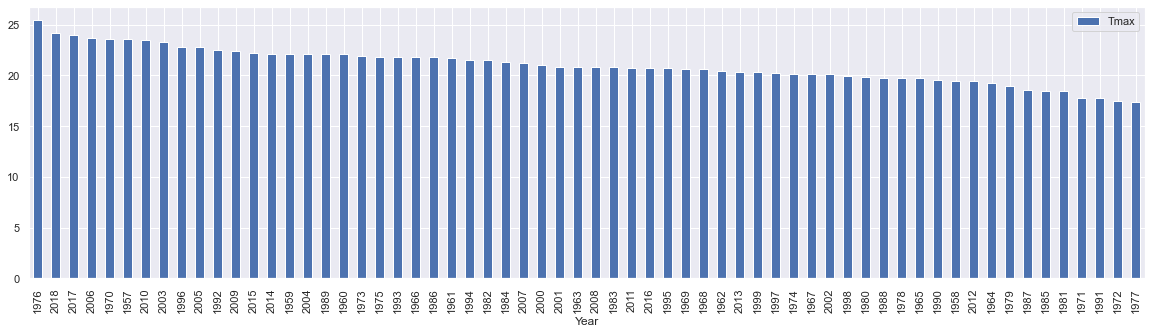

In [240]:
df_july.plot.bar(x='Year', y='Tmax', figsize=(20,5))

In [241]:
import seaborn as sns

sns.set(rc={"figure.figsize": (12, 6)})

<AxesSubplot:xlabel='Tmax'>

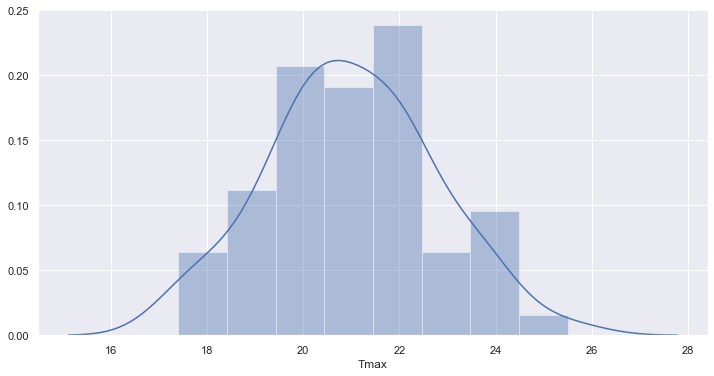

In [242]:
sns.distplot(df_july['Tmax'], kde=True)

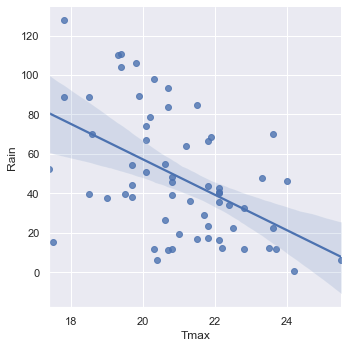

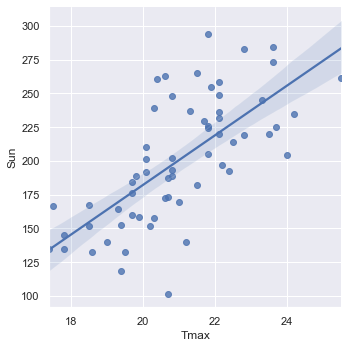

In [243]:
sns.lmplot(data=df_july, x="Tmax", y="Rain")
sns.lmplot(data=df_july, x="Tmax", y="Sun")

In [247]:
import logging
logging.basicConfig(format='%(asctime)s %(message)s')
logging.warning('Watch out!')